<a href="https://colab.research.google.com/github/AKASHTHAPPA123/Traffic-Analysis-and-prediction/blob/main/traffic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pickle
from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded))

df = pd.read_csv(filename)
print(df.head())

Saving traffic.csv to traffic.csv
              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
           Junction      Vehicles            ID
count  48120.000000  48120.000000  4.812000e+04
mean       2.180549     22.791334  2.016330e+10
std        0.966955     20.750063  5.944854e+06
min        1.000000      1.000000  2.015110e+10
25%        1.000000      9.000000  2.016042e+10
50%        2.000000     15.000000  2.016093e+10
75%        3.000000     29.000000  2.017023e+10
max        4.000000    180.000000  2.017063e+10


In [4]:
df = df.dropna()
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [5]:
df['hour'] = df['DateTime'].dt.hour
df['day_of_week'] = df['DateTime'].dt.dayofweek
df['month'] = df['DateTime'].dt.month
df['year'] = df['DateTime'].dt.year



In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTime     48120 non-null  datetime64[ns]
 1   Junction     48120 non-null  int64         
 2   Vehicles     48120 non-null  int64         
 3   ID           48120 non-null  int64         
 4   hour         48120 non-null  int32         
 5   day_of_week  48120 non-null  int32         
 6   month        48120 non-null  int32         
 7   year         48120 non-null  int32         
dtypes: datetime64[ns](1), int32(4), int64(3)
memory usage: 2.2 MB
None
                            DateTime      Junction      Vehicles  \
count                          48120  48120.000000  48120.000000   
mean   2016-09-19 06:03:56.109725696      2.180549     22.791334   
min              2015-11-01 00:00:00      1.000000      1.000000   
25%              2016-04-16 01:45:00      1.000000      9.

In [7]:
# df_top20 = df.head(20)
# print(df_top20)

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'DateTime': <DatetimeArray>
['2015-11-01 00:00:00', '2015-11-01 01:00:00', '2015-11-01 02:00:00',
 '2015-11-01 03:00:00', '2015-11-01 04:00:00', '2015-11-01 05:00:00',
 '2015-11-01 06:00:00', '2015-11-01 07:00:00', '2015-11-01 08:00:00',
 '2015-11-01 09:00:00',
 ...
 '2017-06-30 14:00:00', '2017-06-30 15:00:00', '2017-06-30 16:00:00',
 '2017-06-30 17:00:00', '2017-06-30 18:00:00', '2017-06-30 19:00:00',
 '2017-06-30 20:00:00', '2017-06-30 21:00:00', '2017-06-30 22:00:00',
 '2017-06-30 23:00:00']
Length: 14592, dtype: datetime64[ns]
Unique values in column 'Junction': [1 2 3 4]
Unique values in column 'Vehicles': [ 15  13  10   7   9   6   8  11  12  17  16  20  19  14  22  32  31  35
  26  34  30  27  24  29  21  18  33  28  25  23  40  38  36  48  43  41
  37  39  42  44  47  50  45  46  70  54  52  55  49  58  64  62  51  53
  61  56  57  63  59  60  67  76  79  66  65  68  69  86  73  77  74  71
  72  78   5  81  75  80  82  89  83  93  91  85  90  84  87  94

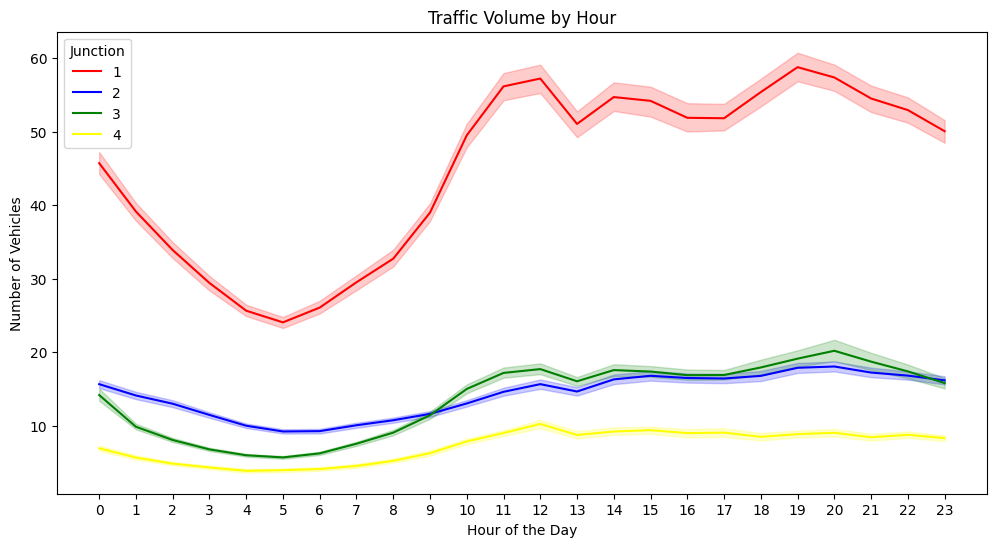

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='Vehicles', hue='Junction',palette=['red', 'blue', 'green', 'yellow'])
plt.title('Traffic Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Vehicles')
plt.legend(title='Junction')
plt.xticks(ticks=range(0, 24))
plt.show()



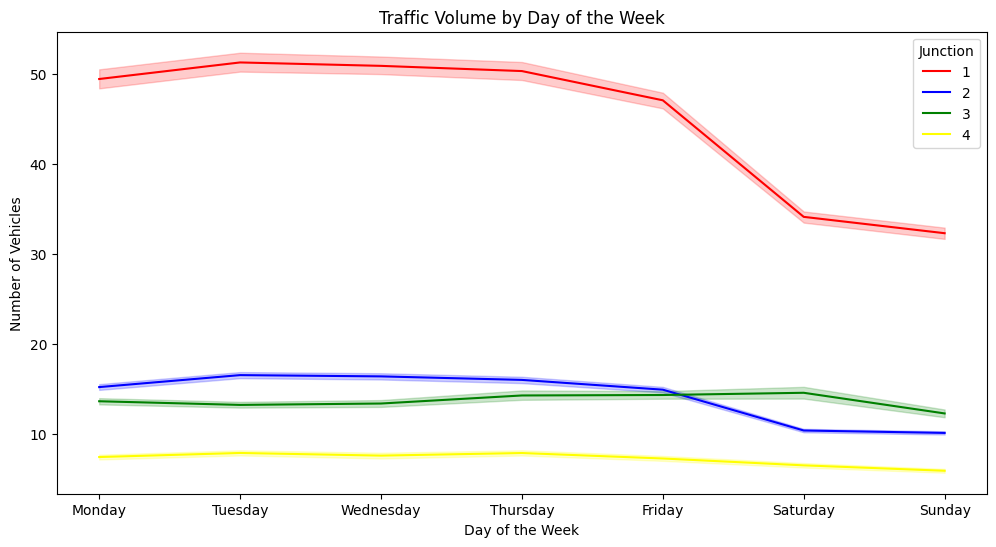

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='day_of_week', y='Vehicles', hue='Junction', palette=['red', 'blue', 'green', 'yellow'])
plt.title('Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Vehicles')
plt.legend(title='Junction')
plt.xticks(ticks=range(0, 7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
plt.show()


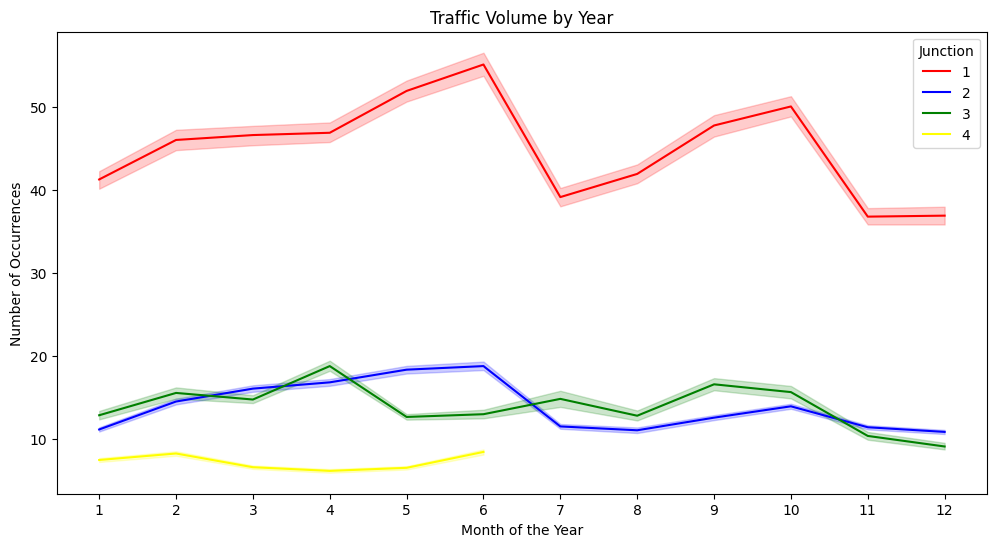

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='month', y='Vehicles', hue='Junction', palette=['red', 'blue', 'green', 'yellow'])
plt.title('Traffic Volume by Year')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Occurrences')
plt.legend(title='Junction')
plt.xticks(ticks= df['month'].unique() )
plt.show()

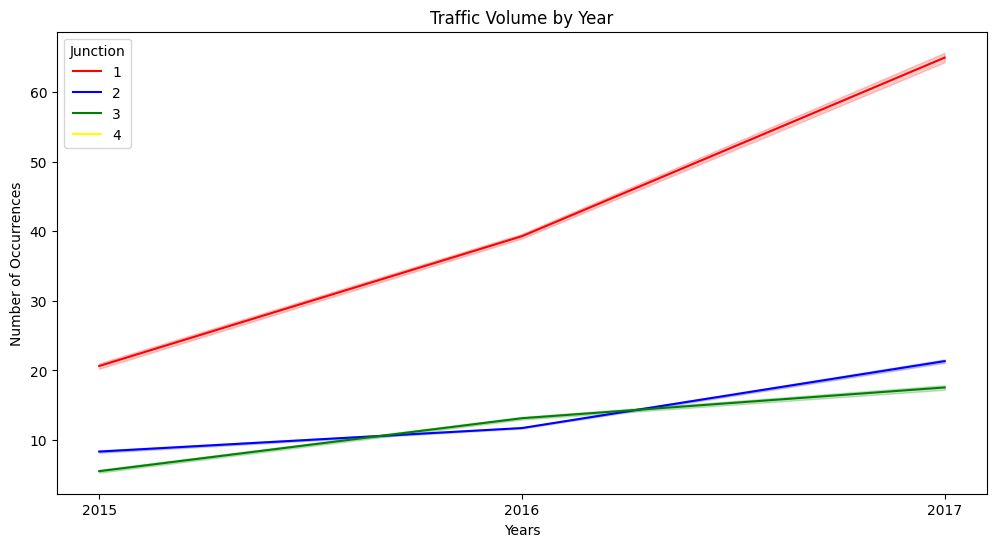

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='Vehicles', hue='Junction', palette=['red', 'blue', 'green', 'yellow'])
plt.title('Traffic Volume by Year')
plt.xlabel('Years')
plt.ylabel('Number of Occurrences')
plt.legend(title='Junction')
plt.xticks(ticks= df['year'].unique() )
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

features = df[['hour', 'day_of_week', 'month', 'year', 'Junction']]
target = df['Vehicles']

features = pd.get_dummies(features, columns=['Junction'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))


Mean Absolute Error: 3.6990446709113716


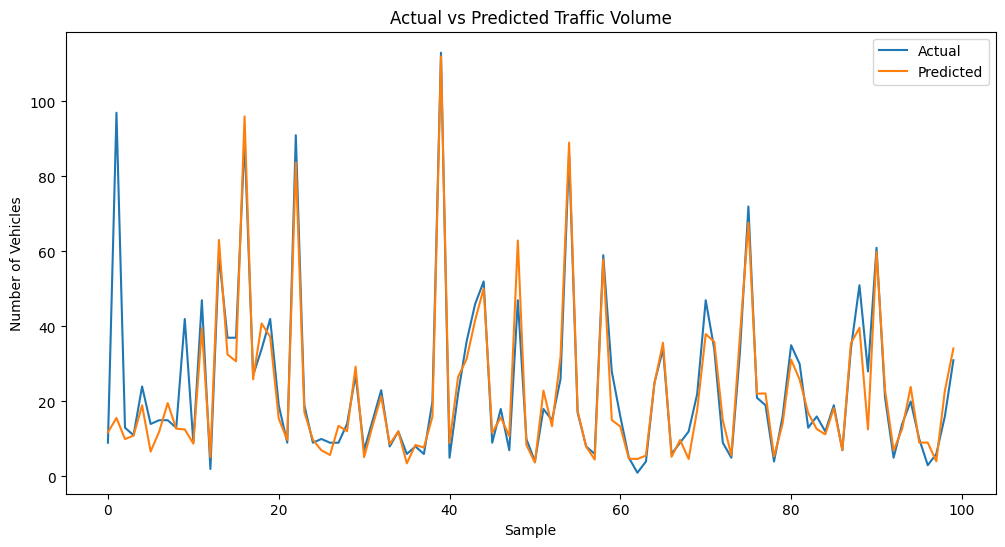

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(predictions[:100], label='Predicted')
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Sample')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()


In [15]:
def categorize_traffic(volume):
    if volume < 20:
        return "No traffic"
    elif volume < 50:
        return "Less traffic"
    elif volume < 100:
        return "Heavy traffic"
    else:
        return "Worst case"

In [16]:
def predict_traffic(date_str, time_str, junction, model, feature_columns):
    # Combine date and time into a single datetime object
    date_time_str = f"{date_str} {time_str}"
    date_time = pd.to_datetime(date_time_str)

    # Extract features from the datetime object
    hour = date_time.hour
    day_of_week = date_time.dayofweek
    month = date_time.month
    year = date_time.year

    # Prepare the input data for the model
    input_data = pd.DataFrame({
        'hour': [hour],
        'day_of_week': [day_of_week],
        'month': [month],
        'year': [year]
    })

    # One-hot encode the junction feature
    junction_dummies = pd.get_dummies([junction], prefix='Junction')

    # Ensure that the dummy variables match the training columns
    for col in feature_columns:
        if col.startswith('Junction') and col not in junction_dummies.columns:
            junction_dummies[col] = 0

    # Combine the features
    input_data = pd.concat([input_data, junction_dummies], axis=1)

    # Ensure the input data has the same columns as the training data
    for col in feature_columns:
        if col not in input_data.columns:
            input_data[col] = 0

    # Arrange the columns in the same order as during training
    input_data = input_data[feature_columns]

    # Predict traffic volume
    predicted_volume = model.predict(input_data)[0]

    # Categorize traffic
    traffic_category = categorize_traffic(predicted_volume)

    return traffic_category


In [17]:
feature_columns = X_train.columns

In [18]:
# Example usage
date_str = input("Enter date (YYYY-MM-DD): ")
time_str = input("Enter time (HH:MM:SS): ")   # Separate time input
junction = int(input("Enter junction (integer): "))  # Junction as an integer

# Predict traffic
traffic_category = predict_traffic(date_str, time_str, junction, model, feature_columns)
print(f'Traffic prediction for {date_str} {time_str} at junction {junction}: {traffic_category}')


Enter date (YYYY-MM-DD): 2004-12-10
Enter time (HH:MM:SS): 10:30:30
Enter junction (integer): 3
Traffic prediction for 2004-12-10 10:30:30 at junction 3: No traffic
